# AI in Orthopaedics 2024 Hackathon

Team Members: Yusuf Salim (Leader), GuruVignesh Balaji, Rohan Reddy and Mohamed Jama

## Notebook Outline

This notebook is divided into two main sections:

### Competition Overview
This section provides a detailed description of the competition, including:
1. **Competition Details**:
   - Goals and objectives of the project.
2. **Submission Requirements**:
   - Deliverables and formats expected from participants.
3. **Evaluation Criteria**:
   - How submissions will be assessed by the reviewers.
4. **Dataset Description**:
   - Information about the dataset used for this project.

---

### Submission Code

This section contains the technical implementation and analysis of our solution, divided into the following parts:

1. **Imports**:  
   - Import necessary libraries for data manipulation, visualization, and machine learning.
2. **Exploratory Data Analysis (EDA)**:  
   - Explore and visualize the dataset to identify patterns, trends, and anomalies.  
   - Perform data cleaning and preprocessing as needed.
3. **Modeling**:  
   - Build and train a machine learning model to classify the dataset.  
   - Optimize hyperparameters to improve performance.
4. **Evaluation**:  
   - Evaluate the trained model using appropriate metrics such as accuracy, precision, recall, F1 score, and ROC-AUC.  
   - Visualize evaluation results with confusion matrices and ROC curves.
5. **Analysis**:  
   - Interpret the model's results and analyze feature importance.  
   - Provide insights into the model's performance and its applicability to real-world scenarios.



## Competition Overview

### 1. Competition Details

Classify orthopedic patients into two classes (**normal** and **abnormal**) based on six biomechanical and image-derived predictors using a machine-learning algorithm. Additionally, participants must describe the steps required to successfully deploy this solution into an orthopedic outpatient clinical setting.

- Design, train, and test an algorithm to discriminate between normal and abnormal patients (herniated disc or spondylolisthesis).
- Participants are free to decide how to assess the performance of the proposed algorithm.
- Provide a **textual description** of the strategy for deploying the solution in a clinical setting.

#### Bonus Challenge
Extend the classifier to categorize patients into three classes:
1. Normal
2. Herniated Disc
3. Spondylolisthesis


### 2. Submission Requirements
 Submissions due in on Monday, 09 December 2024  
 Email submissions to: [events@boa.ac.uk](mailto:events@boa.ac.uk)  
 
 For any questions or clarifications about the competition, please contact:
- **Daniele Demassari**: [daniele.demassari@stryker.com](mailto:daniele.demassari@stryker.com)  
- **Copy**: [events@boa.ac.uk](mailto:events@boa.ac.uk)

#### Core Submission
1. **Model & Inference Code**:  
   - Provide Python code to run the analysis and generate results in a **Jupyter Notebook**.

2. **Documentation**:  
   - Submit a document (e.g., text document, slide deck, etc.) describing:
     - Analysis process
     - Results and interpretation
     - Conclusions
     - Strategy for clinical implementation
     - Instructions on how to run the code

---

#### Additional Files
1. **Environment Information**:  
   - Include a list of libraries and packages used, setup details, and additional requirements necessary to run the Jupyter Notebook (e.g., a fixed random seed for reproducibility).

2. **Team Information**:  
   - Provide a list of team members and their individual contributions to the project as well as the team leader



### 3. Evaluation Criteria

#### Evaluation Metrics
Submissions will be evaluated based on the following criteria:
1. **Understanding of the Problem Statement**:  
   - Score: **1–10**

2. **Quality of the Proposed Solution and Results**:  
   - The reviewers must be able to reproduce the results.  
   - Score: **1–10**

3. **Capability to Describe Implementation in a Clinical Setting**:  
   - Score: **1–10**

4. **Bonus Challenge (Optional)**:  
   - Specify if attempted along with the implemented solution.  
   - Score: **1–3**

---

#### Best Practices
- **Start with a Working Baseline Model**:  
  Demonstrate the methodology for iterative improvements.
- **Include Intermediate Outputs**:  
  Provide outputs such as graphs, performance tables, or other visualizations of intermediate steps.
- **Ensure Reproducibility**:  
  Submissions must include all necessary files, data, and code to reproduce the results.
- **Avoid Incomplete Submissions**:  
  Incomplete or corrupted submissions will be rejected.

---

#### Reviewers
- The evaluation will be conducted by a **committee of reviewers**, including members of the **Stryker AI team** and organizers of the **BOA AI 2024 meeting**.
- Each reviewer will independently appraise submissions based on the evaluation metrics described above.
- The **average score** of all reviewers' evaluations for the same entry will be used to rank submissions and determine the two best solutions.


### 4. Dataset Description
  The dataset is avaliable at https://archive.ics.uci.edu/dataset/212/vertebral+column.  
  It contains six biomechanical features used to classify orthopedic patients into:
  - Two classes: normal or abnormal.
  - Three classes: normal, herniated disc, or spondylolisthesis.

### Submission Code

This section contains the technical implementation and analysis of our solution, divided into the following parts:

1. **Imports**:  
   - Import necessary libraries for data manipulation, visualization, and machine learning.
2. **Exploratory Data Analysis (EDA)**:  
   - Explore and visualize the dataset to identify patterns, trends, and anomalies.  
   - Perform data cleaning and preprocessing as needed.
3. **Modeling**:  
   - Build and train a machine learning model to classify the dataset.  
   - Optimize hyperparameters to improve performance.
4. **Evaluation**:  
   - Evaluate the trained model using appropriate metrics such as accuracy, precision, recall, F1 score, and ROC-AUC.  
   - Visualize evaluation results with confusion matrices and ROC curves.
5. **Analysis**:  
   - Interpret the model's results and analyze feature importance.  
   - Provide insights into the model's performance and its applicability to real-world scenarios.

## Submission Code 

### 1. Imports



Importing libraries.

In [124]:
# Data Manipulation and Analysis
import pandas as pd  
import numpy as np  

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Machine Learning Tools
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

Fetching dataset from UCI and splitting into features and targets.

In [125]:
from ucimlrepo import fetch_ucirepo 
  
vertebral_column = fetch_ucirepo(id=212) 
type(vertebral_column)
X = vertebral_column.data.features 
y = vertebral_column.data.targets
type(X)
type(y)

pandas.core.frame.DataFrame

In [126]:
X.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [127]:
y.head()

,class
0,Hernia
1,Hernia
2,Hernia
3,Hernia
4,Hernia


### 2. Exploratory data analysis

Defining color schemes and plot helper function for consistent plots

In [128]:
plot_order=['Normal','Hernia','Spondylolisthesis']
color_order_0=['#4B9B6E','#1B5E3A','#A8D5BA'] #greens

plot_order_1=['Normal','Abnormal']
color_order_1 = ['#5e8fa4','#12267b'] 

In [129]:
#style: paper notebook talk poster
def plotting_helper(plot_type,col_name,class_name='class',color_scheme=color_order_0,style="notebook"):
    sns.set_context("paper")
    sns.set_style("white")
    f, ax = plt.subplots(figsize=(6, 3))

    if plot_type=="box":
        sns.boxplot(data=df, x=col_name, y=class_name, hue=class_name,order=plot_order,palette=color_scheme)
        sns.boxplot(data=df, x=col_name,y='all', color='Grey')

        ax.set_title(col_name+" BoxPlot by Class")
        
    elif plot_type=="jitter":
        sns.stripplot(data=df, x=col_name, y=class_name, hue=class_name,order=plot_order,palette=color_scheme)
        sns.stripplot(data=df, x=col_name,y='all' ,color='Grey')
        ax.set_title(col_name+" SwarmPlot by Class")

    elif plot_type=='violin':
        sns.violinplot(data=df, x=col_name, y=class_name, hue=class_name,order=plot_order,palette=color_scheme)
        sns.violinplot(data=df, x=col_name,y='all' , color='Grey')
        ax.set_title(col_name+" SwarmPlot by Class")   
        
    ax.xaxis.grid(True)    
    ax.set_xlabel(col_name)
    ax.set_ylabel("Class")
    sns.despine(left=True)
    
    #plt.savefig("./plots/"+col_name+plot_type+".eps", format='eps')  
    #plt.savefig("./plots/"+col_name+plot_type+".png", format='png')  
    plt.show

def histogram_plotter(col_name,class_name='class',color_scheme=color_order_0,style="notebook"):
    fig, axes = plt.subplots(1, 5, figsize=(18, 5), constrained_layout=True)

    sns.histplot(df[df['class']=="Normal"][col_name], bins=20, kde=True, ax=axes[0],color=color_scheme[2],alpha=0.9)
    axes[0].set_xlabel('Normal '+ col_name)
    axes[0].set_ylabel('Frequency')

    sns.histplot(df[df['class']=="Hernia"][col_name], bins=20, kde=True, ax=axes[1],color=color_scheme[0],alpha=0.9)
    axes[1].set_xlabel('Herniated '+ col_name)
    axes[1].set_ylabel('Frequency')

    sns.histplot(df[df['class']=="Spondylolisthesis"][col_name], bins=20, kde=True, ax=axes[2],color=color_scheme[1],alpha=0.9)
    axes[2].set_xlabel('Spondylolisthesis '+ col_name)
    axes[2].set_ylabel('Frequency')

    sns.histplot(df[df['class']=="Normal"][col_name], bins=20, kde=True, ax=axes[3],color=color_scheme[2],alpha=0.5)
    sns.histplot(df[df['class']=="Hernia"][col_name], bins=20, kde=True, ax=axes[3],color=color_scheme[0],alpha=0.5)
    sns.histplot(df[df['class']=="Spondylolisthesis"][col_name], bins=20, kde=True, ax=axes[3],color=color_scheme[1],alpha=0.5)
    axes[3].set_xlabel('Spondylolisthesis '+ col_name)
    axes[3].set_ylabel('Frequency')

    sns.histplot(df[col_name], bins=20, kde=True, ax=axes[4],color='Grey',alpha=0.9)
    axes[4].set_xlabel('All data')
    axes[4].set_ylabel('Frequency')

    #plt.savefig("./plots/"+col_name+"histogram.eps", format='eps')  
    #plt.savefig("./plots/"+col_name+"histogram.png", format='png') 
    plt.show

#### 2a. Data overview

In [130]:
print(vertebral_column.metadata)
print(vertebral_column.variables)

{'uci_id': 212, 'name': 'Vertebral Column', 'repository_url': 'https://archive.ics.uci.edu/dataset/212/vertebral+column', 'data_url': 'https://archive.ics.uci.edu/static/public/212/data.csv', 'abstract': 'Data set containing values for six biomechanical features used to classify orthopaedic patients into 3 classes (normal, disk hernia or spondilolysthesis) or 2 classes (normal or abnormal).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 310, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2005, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5K89B', 'creators': ['Guilherme Barreto', 'Ajalmar Neto'], 'intro_paper': None, 'additional_info': {'summary': "Biomedical data set built by Dr. Henrique da Mota during a medical residence period in the Group of Applied R

Notes: No Nulls in dataset. 6 numerical features (X) and 1 catagorical target column (y)

In [131]:
X.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [132]:
y['class'].value_counts()

class
Spondylolisthesis    150
Normal               100
Hernia                60
Name: count, dtype: int64

Notes: Intial statistical information about X suggests presence of outliers/skew in features (eg difference in degree_spondlolisthesis for mean: 26.3 and median: 11.8). Class imbalance also present in y

In [133]:
df = X.copy()
df['class'] = y
df.head()
df.shape

(310, 7)

In [134]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


Notes: Combined dataset to allow for further exploration of data by class. Focusing more on median for now due to robustness to outliers.

In [135]:
df_one_hot = pd.get_dummies(df['class'])
df = pd.concat([df, df_one_hot], axis=1)
df['Abnormal']=df['Hernia'] + df['Spondylolisthesis']
df['all']='All data'

Notes: 1 hot encoding class for both standard and bonus challenge

In [136]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,Hernia,Normal,Spondylolisthesis,Abnormal,all
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia,True,False,False,True,All data
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia,True,False,False,True,All data
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia,True,False,False,True,All data
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia,True,False,False,True,All data
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia,True,False,False,True,All data


#### 2b. Statistical information per feature

##### Pelvic Incidence

In [137]:
display(df.groupby('class')['pelvic_incidence'].describe())

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Hernia,60.0,47.638407,10.697131,26.147921,41.018099,46.416169,53.922329,74.433593
Normal,100.0,51.685244,12.368161,30.741938,42.817849,50.123115,61.470097,89.834676
Spondylolisthesis,150.0,71.514224,15.109337,37.903910,60.658136,72.149306,81.075893,129.834041


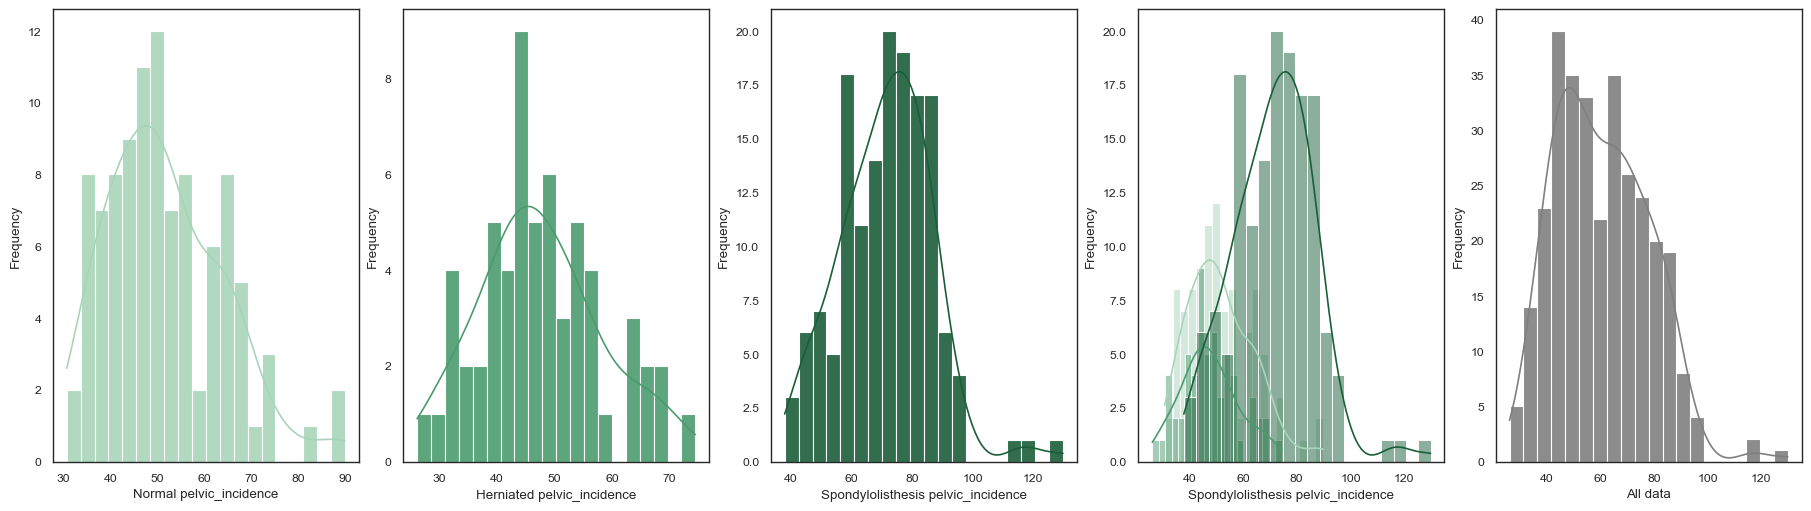

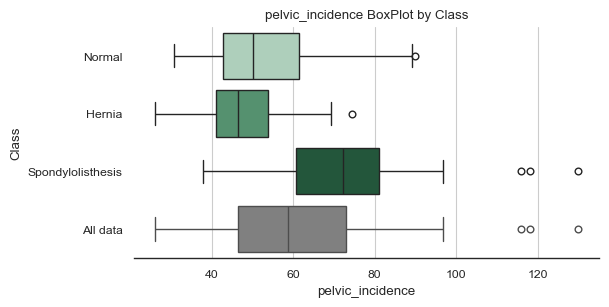

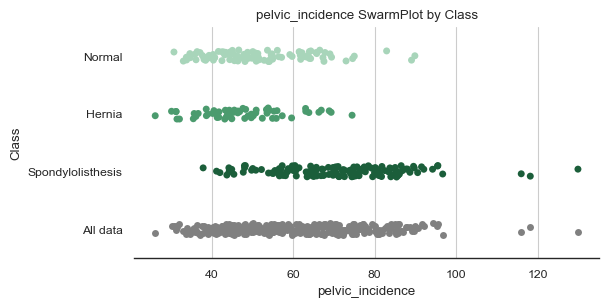

In [138]:
histogram_plotter(col_name="pelvic_incidence")
plotting_helper(plot_type="box",col_name="pelvic_incidence")
plotting_helper(plot_type="jitter",col_name="pelvic_incidence")

Notes: pelvic_incidence may seperate classes by median (50%) as Hernia < Normal < Spondylolisthesis

##### Pelvic Tilt

In [139]:
display(df.groupby('class')['pelvic_tilt'].describe())

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Hernia,60.0,17.398795,7.016708,3.144669,12.874329,16.949285,22.002980,41.557331
Normal,100.0,12.821414,6.778503,-5.845994,8.799951,13.482435,16.785953,29.894119
Spondylolisthesis,150.0,20.748038,11.506169,-6.554948,13.461149,19.309548,29.229680,49.431864


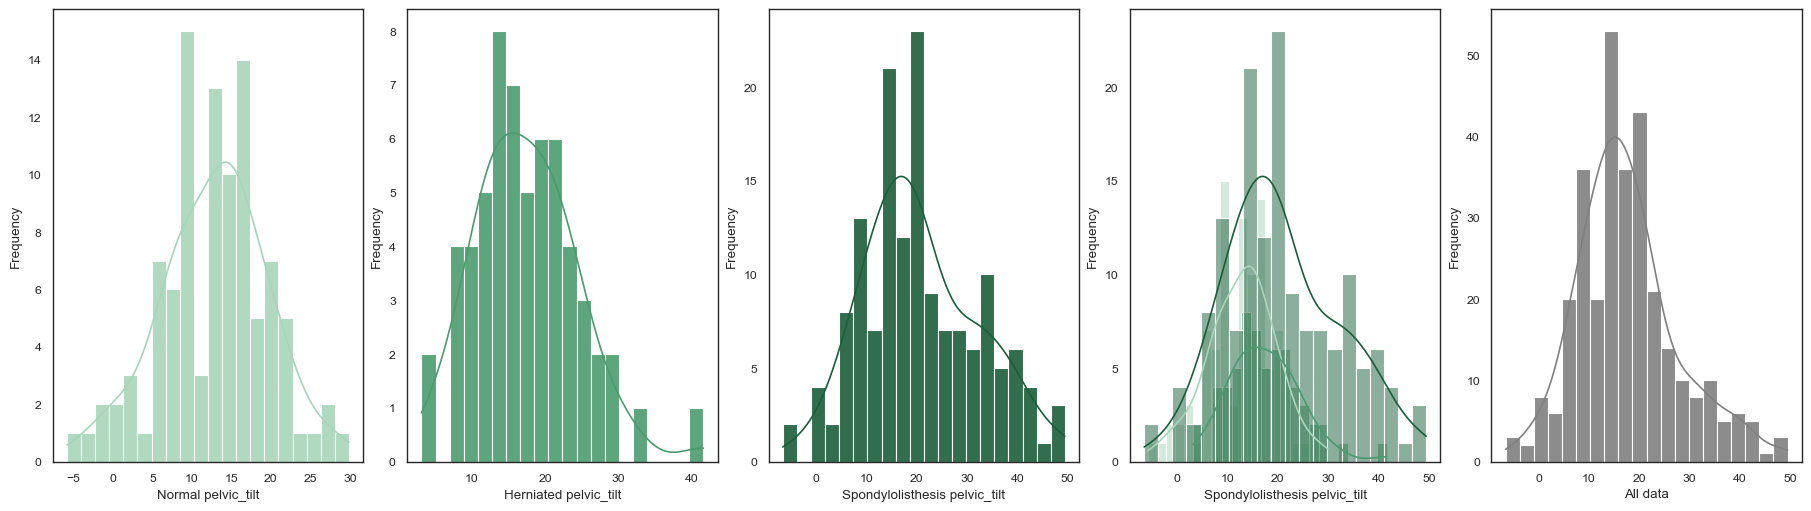

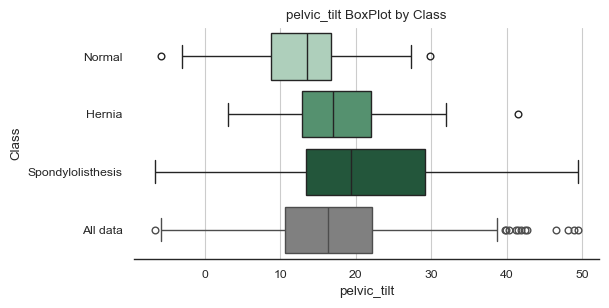

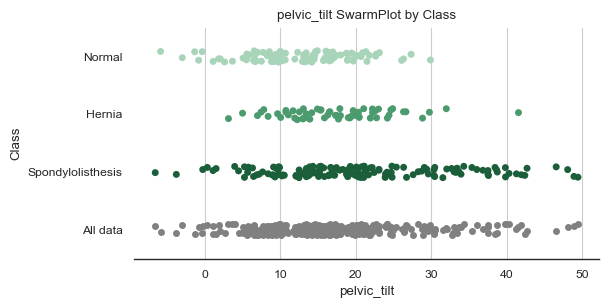

In [140]:
histogram_plotter(col_name="pelvic_tilt")
plotting_helper(plot_type="box",col_name="pelvic_tilt")
plotting_helper(plot_type="jitter",col_name="pelvic_tilt")

Notes: pelvic_tilt may seperate classes by median (50%) as Normal < Hernia < Spondylolisthesis

##### Lumber Lordosis angle

In [141]:
display(df.groupby('class')['lumbar_lordosis_angle'].describe())

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Hernia,60.0,35.463524,9.767795,14.000000,29.038069,35.164873,42.011563,62.275275
Normal,100.0,43.542605,12.361388,19.071075,35.000000,42.638923,51.602346,90.563461
Spondylolisthesis,150.0,64.110108,16.397068,24.710274,52.000000,62.555200,76.990924,125.742385


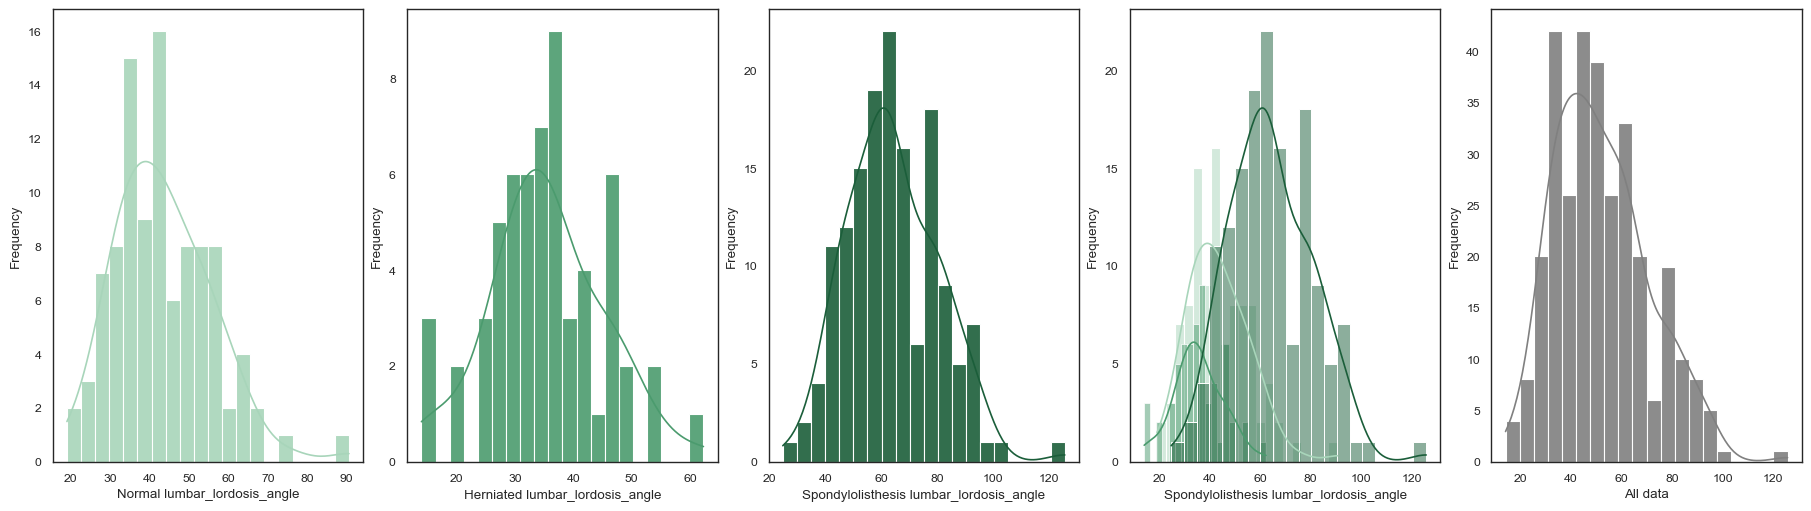

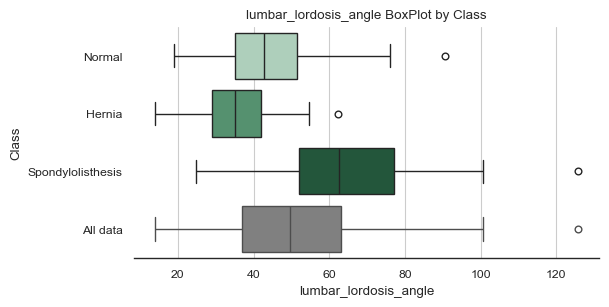

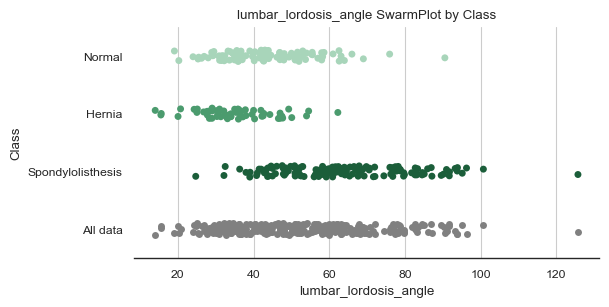

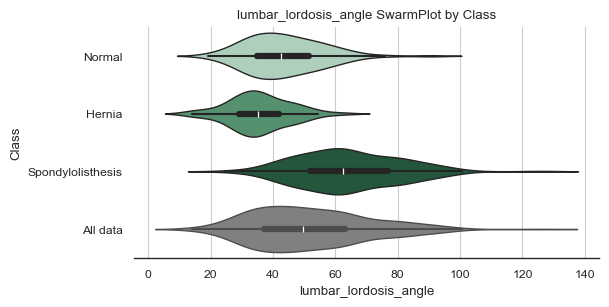

In [142]:
histogram_plotter(col_name="lumbar_lordosis_angle")
plotting_helper(plot_type="box",col_name="lumbar_lordosis_angle")
plotting_helper(plot_type="jitter",col_name="lumbar_lordosis_angle")
plotting_helper(plot_type="violin",col_name="lumbar_lordosis_angle")

Notes: lumbar_lordosis_angle may seperate classes by median (50%) as  Hernia < Normal< Spondylolisthesis

##### Sacral Slope

In [143]:
display(df.groupby('class')['sacral_slope'].describe())

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Hernia,60.0,30.239612,7.555388,13.366931,25.215275,30.000659,34.962103,46.613539
Normal,100.0,38.863830,9.624004,17.386972,32.340487,37.059694,44.608788,67.195460
Spondylolisthesis,150.0,50.766186,12.318813,19.290046,43.166815,50.751695,56.675435,121.429566


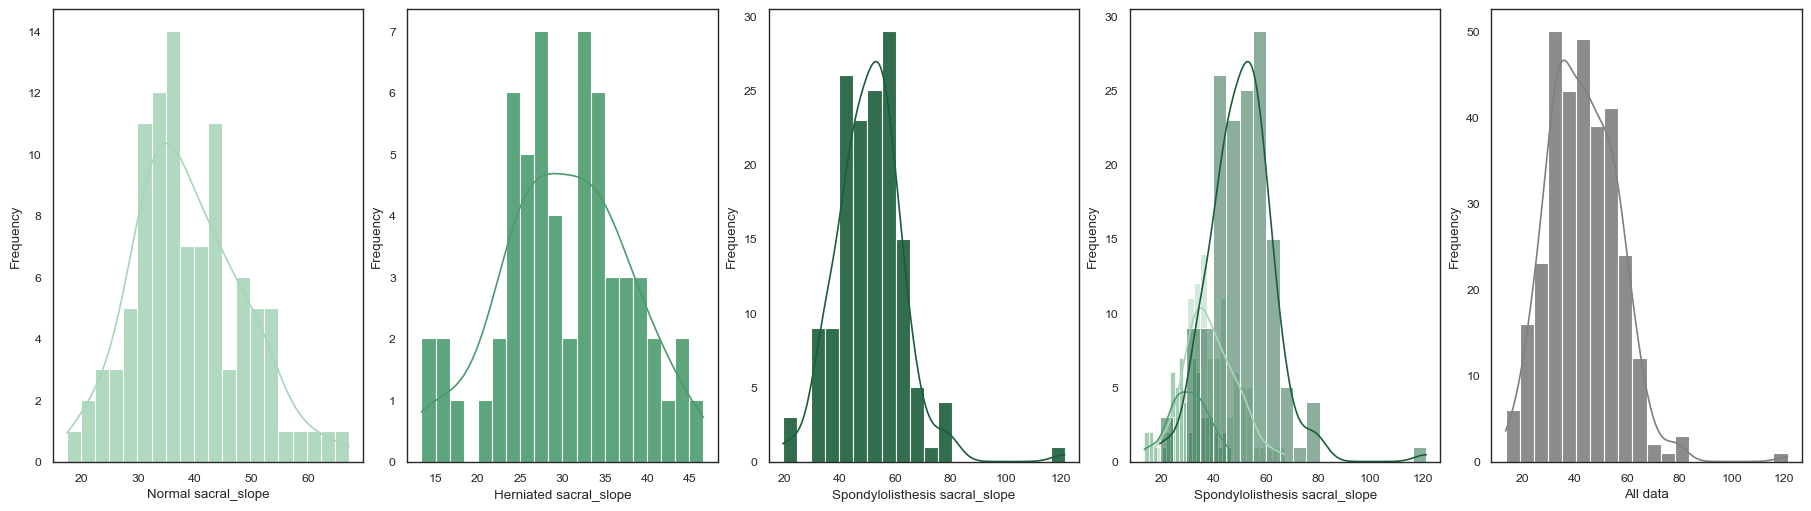

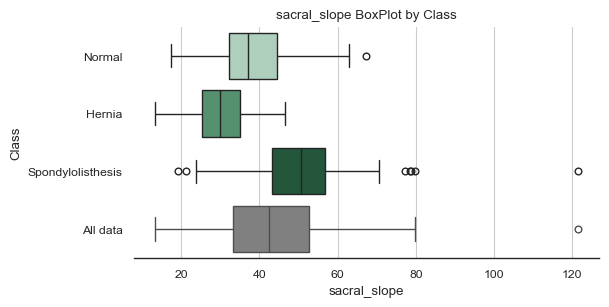

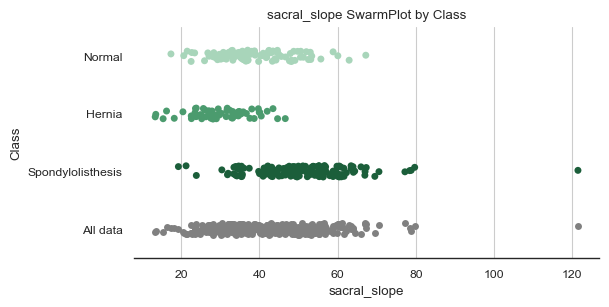

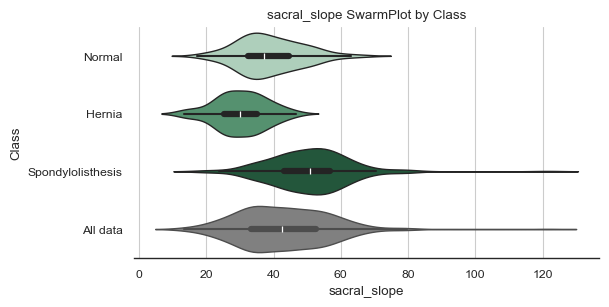

In [144]:
histogram_plotter(col_name="sacral_slope")
plotting_helper(plot_type="box",col_name="sacral_slope")
plotting_helper(plot_type="jitter",col_name="sacral_slope")
plotting_helper(plot_type="violin",col_name="sacral_slope")

Notes: sacral_slope may seperate classes by median (50%) as  Hernia < Normal< Spondylolisthesis

##### Pelvic Radius

In [145]:
display(df.groupby('class')['pelvic_radius'].describe())

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Hernia,60.0,116.474968,9.355720,84.241415,112.280320,116.696146,122.042999,137.540613
Normal,100.0,123.890834,9.014246,100.501192,118.182659,123.874328,129.040401,147.894637
Spondylolisthesis,150.0,114.518810,15.579995,70.082575,104.706761,114.842400,123.337307,163.071041


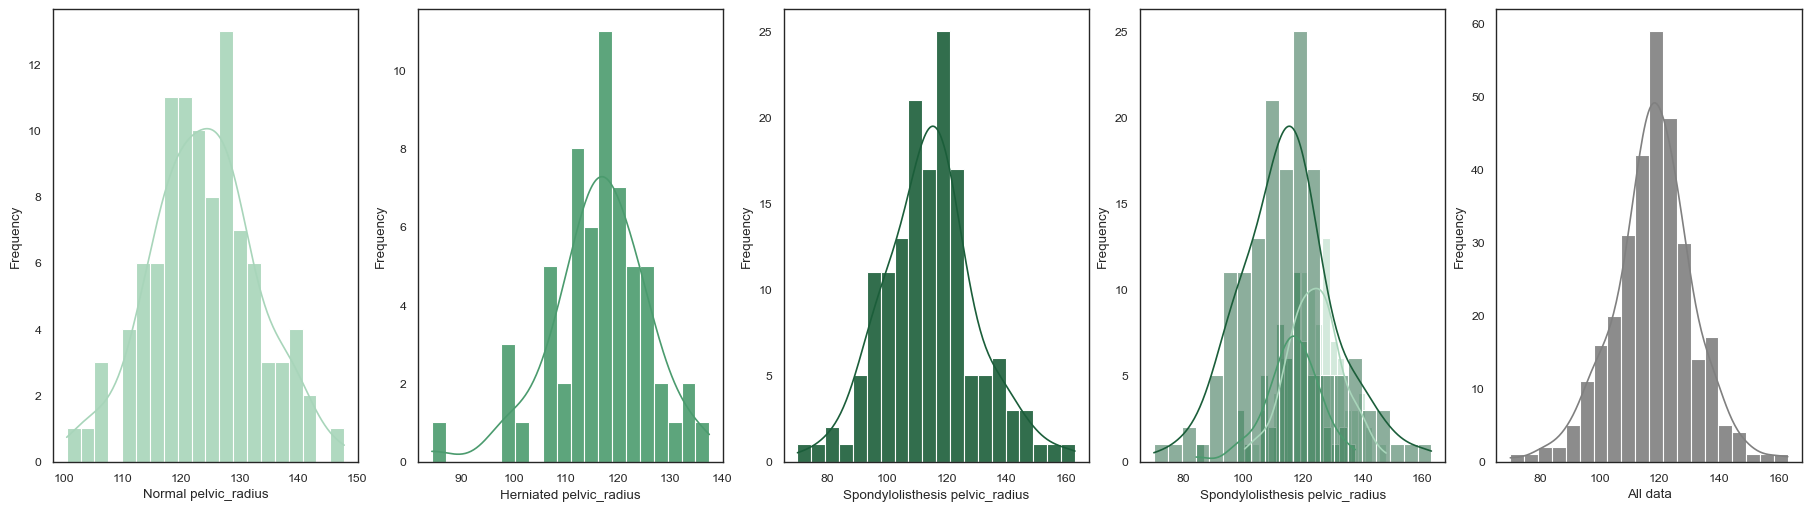

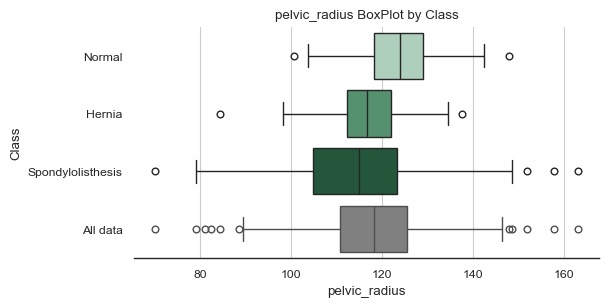

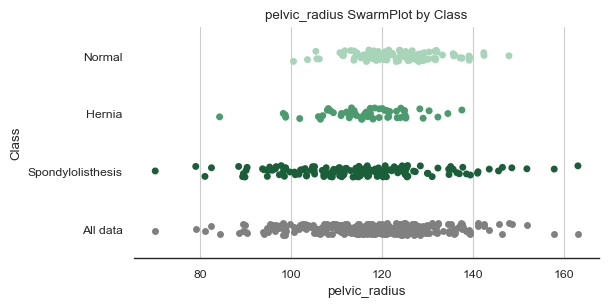

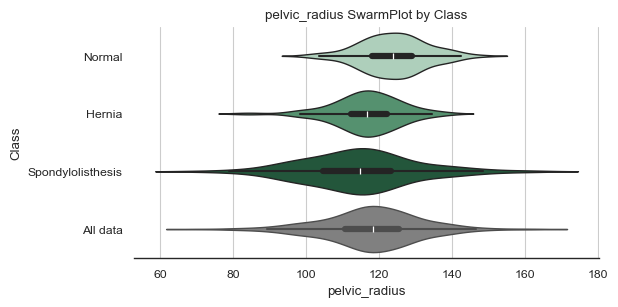

In [146]:
histogram_plotter(col_name="pelvic_radius")
plotting_helper(plot_type="box",col_name="pelvic_radius")
plotting_helper(plot_type="jitter",col_name="pelvic_radius")
plotting_helper(plot_type="violin",col_name="pelvic_radius")

Notes: pelvis_radius may seperate normal from other classes by median (50%) as  Hernia/Spondylolisthesis < Normal 

##### Degree Spondylolisthesis

In [147]:
display(df.groupby('class')['degree_spondylolisthesis'].describe())

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Hernia,60.0,2.480251,5.531177,-10.675871,-0.910819,2.542441,6.059666,15.779697
Normal,100.0,2.186572,6.307483,-11.058179,-1.511360,1.152710,4.968807,31.172767
Spondylolisthesis,150.0,51.896687,40.108030,1.010041,30.393271,42.372509,61.894425,418.543082


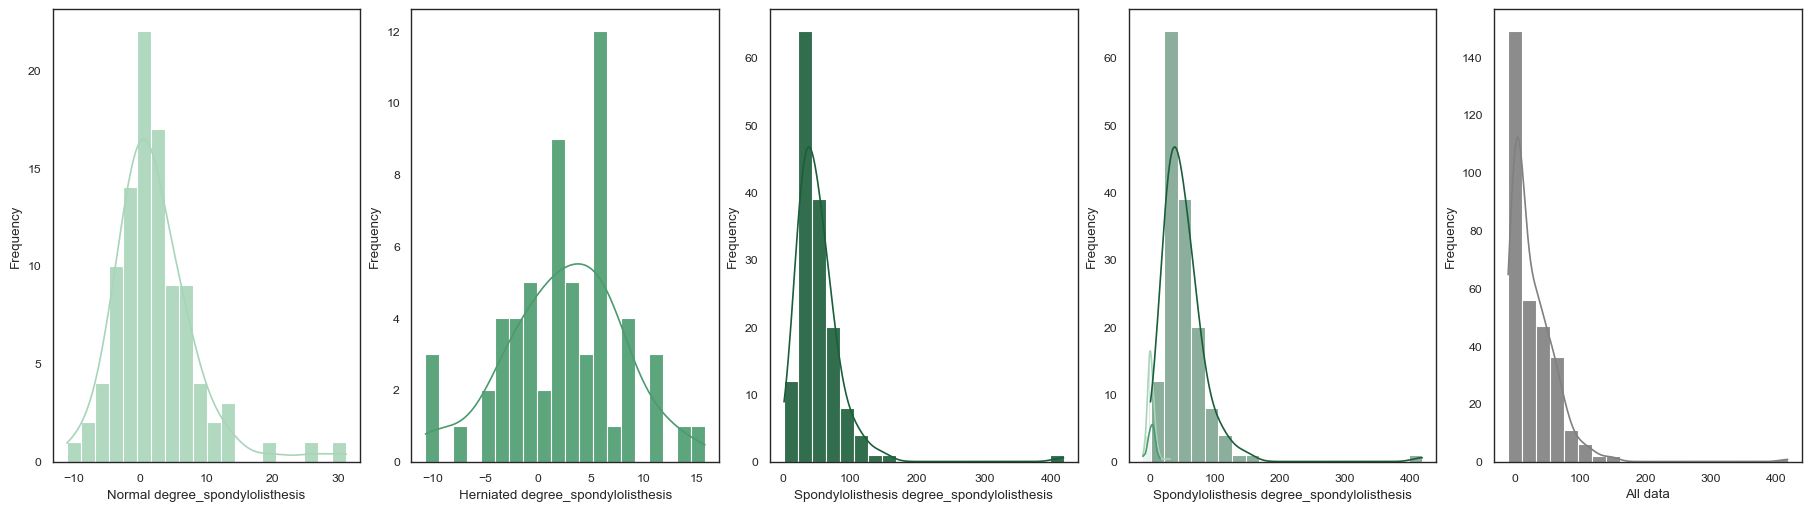

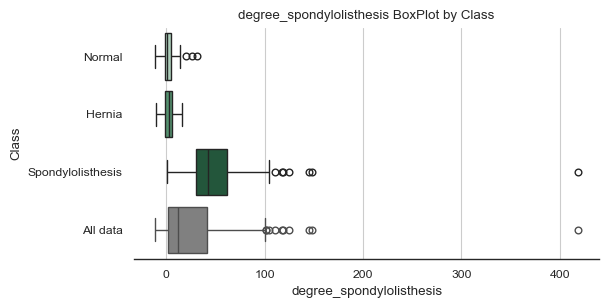

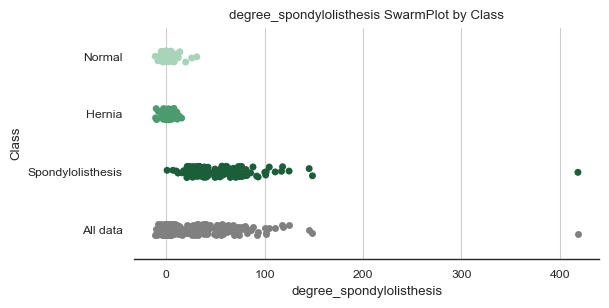

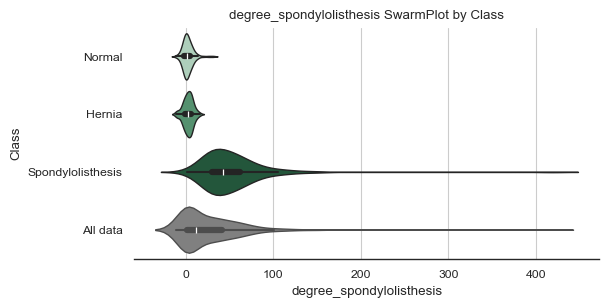

In [148]:
histogram_plotter(col_name="degree_spondylolisthesis")
plotting_helper(plot_type="box",col_name="degree_spondylolisthesis")
plotting_helper(plot_type="jitter",col_name="degree_spondylolisthesis")
plotting_helper(plot_type="violin",col_name="degree_spondylolisthesis")

Notes: degree_spondylolisthesis may seperate spondylolisthesis from other classes by median (50%) as  Hernia/Normal < Spondylolisthesis

#### 2c. Outlier Masking

In [149]:
df['mask1'] = [[] for _ in range(df.shape[0])]
df['mask2'] = [[] for _ in range(df.shape[0])]
df['mask3'] = [[] for _ in range(df.shape[0])]

Note: Three mask columns are created in order to identify where outliers occur. These mask columns contain lists that are by default empty. The column numbers where outliers are detected are appended to the list starting from 1.

In [150]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

# Z-Score Outlier Detection
def detect_outliers_zscore(series, threshold=3):
    z_scores = zscore(series)
    return abs(z_scores) > threshold

# MAD Outlier Detection
def detect_outliers_mad(series, threshold=3):
    median = series.median()
    mad = np.median(np.abs(series - median))
    modified_z_scores = 0.6745 * (series - median) / mad
    return abs(modified_z_scores) > threshold

Note: Three seperate outlier detection methods are used (IQR, Z-Score, MAD).   
- The IQR is the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the data.   
- A z-score measures how many standard deviations a data point is from the mean.  
- MAD is the median of the absolute deviations from the median

In [151]:
for col in df.columns[0:5:1]:  # loop over the 6 feature columns only
    col_number = df.columns.get_loc(col) + 1  

    outliers_iqr = detect_outliers_iqr(df[col])
    df.loc[outliers_iqr, 'mask1'] = df.loc[outliers_iqr, 'mask1'].apply(lambda x: x + [col_number])
    
    outliers_zscore = detect_outliers_zscore(df[col])
    df.loc[outliers_zscore, 'mask2'] = df.loc[outliers_zscore, 'mask2'].apply(lambda x: x + [col_number])
    
    outliers_mad = detect_outliers_mad(df[col])
    df.loc[outliers_mad, 'mask3'] = df.loc[outliers_mad, 'mask3'].apply(lambda x: x + [col_number])

In [152]:
print(f"Empty lists in mask1: {df['mask1'].apply(lambda x: len(x) == 0).sum()}")
print(f"Empty lists in mask2: {df['mask2'].apply(lambda x: len(x) == 0).sum()}")
print(f"Empty lists in mask3: {df['mask3'].apply(lambda x: len(x) == 0).sum()}")

Empty lists in mask1: 284
Empty lists in mask2: 300
Empty lists in mask3: 294


Note: DF started with 310 rows, therefore outliers detected by each method respectively are IQR: 26, Z-Score: 10, MAD: 16.

#### 2D. Correlation Analysis and PCA

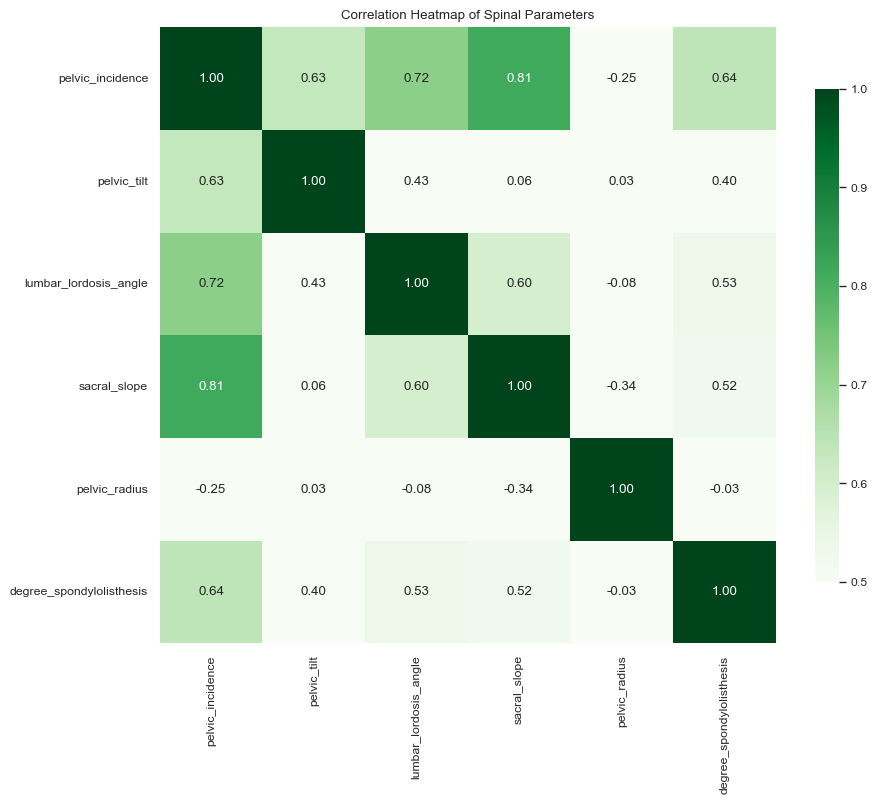

In [153]:
correlation_matrix = df[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmin=0.5, vmax=1,annot=True, fmt=".2f", cmap="Greens", square=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap of Spinal Parameters")
plt.show()

Note: High correlation observed between sacral_slope and pelvic_incidence as well as lumbar_lordosis_angle and pelvic_incidence "pelvic incidence should equal the pelvic tilt plus sacral slope, and lumbar lordosis created should be within 9 degrees of the pelvic incidence" - "https://www.sciencedirect.com/topics/nursing-and-health-professions/sacral-slope#:~:text=Considerable%20intraobserver%20and%20interobserver%20variability,variations%20in%20measurement%20will%20occur."
Generally Lumbar lordosis is wthin ~9 degrees of pelvic incidence
Pelvic incidence = pelivic tilt + sacral slope

This is important to note as generally we only want independant features as inputs to certain models to prevent overfitting to the training data. This is less of an issue in tree based models.

In [154]:
df.head(1)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,Hernia,Normal,Spondylolisthesis,Abnormal,all,mask1,mask2,mask3
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.2544,Hernia,True,False,False,True,All data,[],[],[]


Performing PCA to see if the data can be "summarised" into fewer components. 

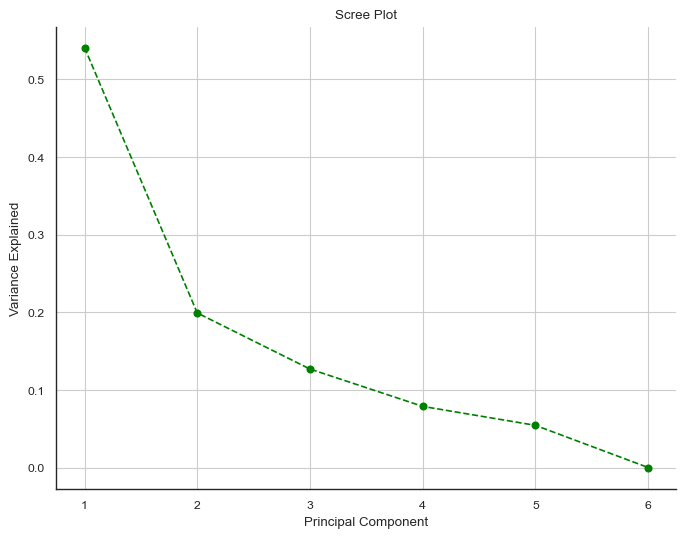

In [155]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                                    'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']])

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
sns.set_style("white") 
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--',color='Green')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))

ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(True) 
plt.show()


Scree plot above explains how much of the variance (information) of the dataset is explained by each now principal component. In essence 54% of the information in the original dataset is captured by only 1 principal component/row, 74% of the information in the original dataset is captured by the principal components 1 and /row and so on. Therefore it is possible to reduce the number of features, and capture the majority of the dataset in half the amount of features. Reduction in cumulative variance at higher order principal components could be due to noise/ outliers in the original dataset.

In [156]:
n_components = X_pca.shape[1]
pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)
df = pd.concat([df.reset_index(drop=True), pca_df], axis=1)


In [157]:
cumulative_variance = np.cumsum(explained_variance)
var_explained = {
    "Principal Component": [f"PC{i+1}" for i in range(len(cumulative_variance))],
    "Cumulative Explained Variance": [var for var in cumulative_variance]
}

var_explained_df=pd.DataFrame(var_explained)

display(var_explained_df)

,Principal Component,Cumulative Explained Variance
0,PC1,0.540964
1,PC2,0.740061
2,PC3,0.866909
3,PC4,0.945664
4,PC5,1.000000
5,PC6,1.000000


The contribution of each of the 6 original features to each of the new 6 principal components can be calculated as below.

In [158]:
loadings = pca.components_

loadings_df = pd.DataFrame(
    loadings,
    columns=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
             'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
    index=[f'PC{i+1}' for i in range(len(loadings))]
)

print("PCA Loadings (Feature Contributions to PCs):")
print(loadings_df)

PCA Loadings (Feature Contributions to PCs):
     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
PC1          0.535142     0.323585           4.579696e-01      0.445906   
PC2         -0.002194     0.527545           9.287513e-02     -0.396157   
PC3          0.096069     0.648701          -1.523384e-01     -0.360313   
PC4         -0.102799    -0.006441          -5.480997e-01     -0.127201   
PC5         -0.423458    -0.150562           6.767701e-01     -0.431500   
PC6          0.717290    -0.416492          -1.456824e-11     -0.558596   

     pelvic_radius  degree_spondylolisthesis  
PC1  -1.434967e-01              4.239775e-01  
PC2   7.277556e-01              1.627769e-01  
PC3  -5.859906e-01             -2.711841e-01  
PC4  -1.742130e-01              8.015281e-01  
PC5  -2.757631e-01              2.788522e-01  
PC6  -3.446257e-12              8.303247e-12  


This information is better visualsed plotted on a heatmap.

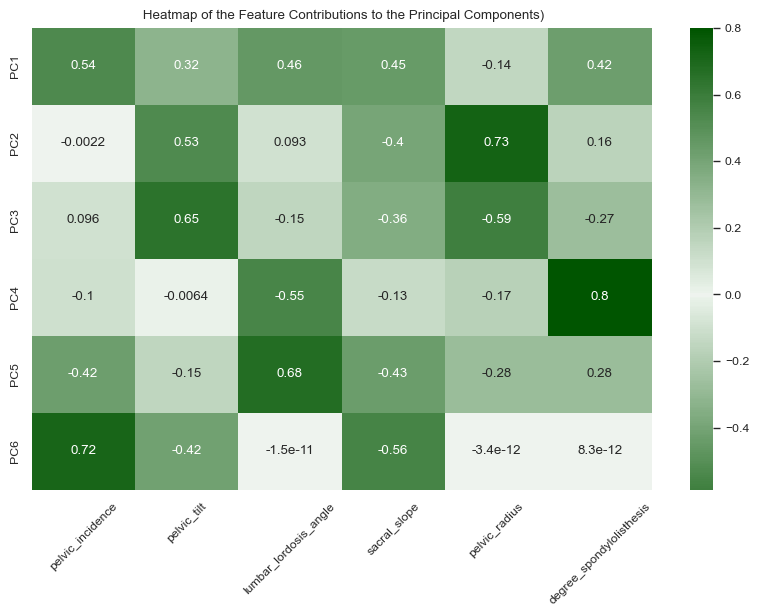

In [159]:
plt.figure(figsize=(10, 6))
green_palette = sns.diverging_palette(130, 130, s=120, l=30, as_cmap=True)

sns.heatmap(loadings_df, annot=True, cmap=green_palette, center=0)
plt.xticks(rotation=45)  
plt.title(' Heatmap of the Feature Contributions to the Principal Components)')
plt.show()

In [160]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class',
       'Hernia', 'Normal', 'Spondylolisthesis', 'Abnormal', 'all', 'mask1',
       'mask2', 'mask3', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
      dtype='object')

Given that 3 principal components capture >85% of the original dataset it may be possible to now plot the original 6 dimensions of data in 3 dimensions and visualise if there are any seperates between normal and abnormal datapoints. The plot below shows that although no clear boundary of separation exists, there is a central cluster of normal datapoints, from which abnormal datapoints radiate out from.

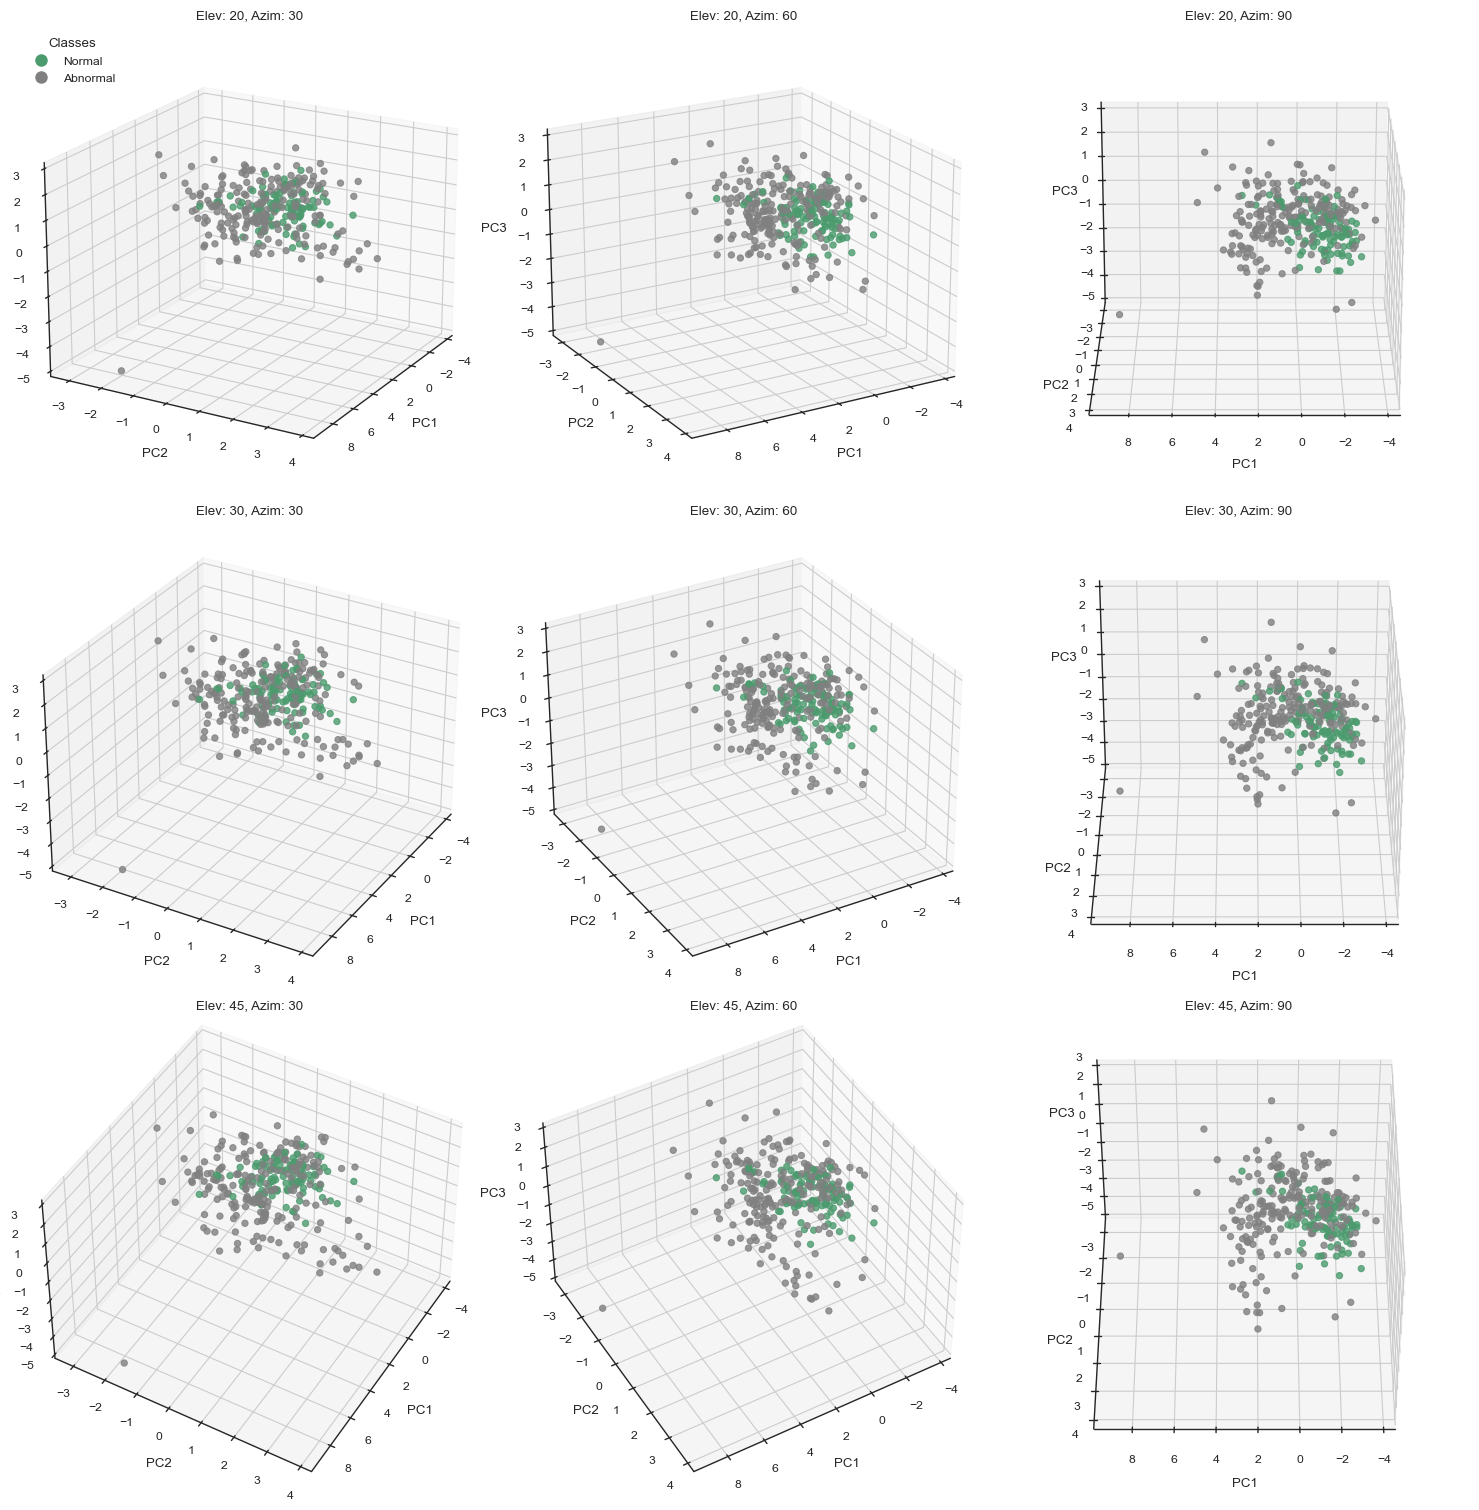

In [161]:
pc1 = df['PC1']
pc2 = df['PC2']
pc3 = df['PC3']
classes = df[['Normal', 'Abnormal']].idxmax(axis=1)

color_map = {'Normal': '#4B9B6E', 'Abnormal': 'Grey'}
colors = classes.map(color_map)

elevations = [20, 30, 45]
azimuths = [30, 60, 90]

fig = plt.figure(figsize=(15, 15))

for i, elev in enumerate(elevations):
    for j, azim in enumerate(azimuths):
        ax = fig.add_subplot(3, 3, i * 3 + j + 1, projection='3d')
        
        scatter = ax.scatter(pc1, pc2, pc3, c=colors, s=20, alpha=0.8)
        
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        ax.set_title(f'Elev: {elev}, Azim: {azim}')
        ax.view_init(elev=elev, azim=azim)
        
        if i == 0 and j == 0:
            handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=cls) 
                       for cls, color in color_map.items()]
            ax.legend(handles=handles, loc='upper left', title='Classes',frameon=False)

plt.tight_layout()
plt.show()



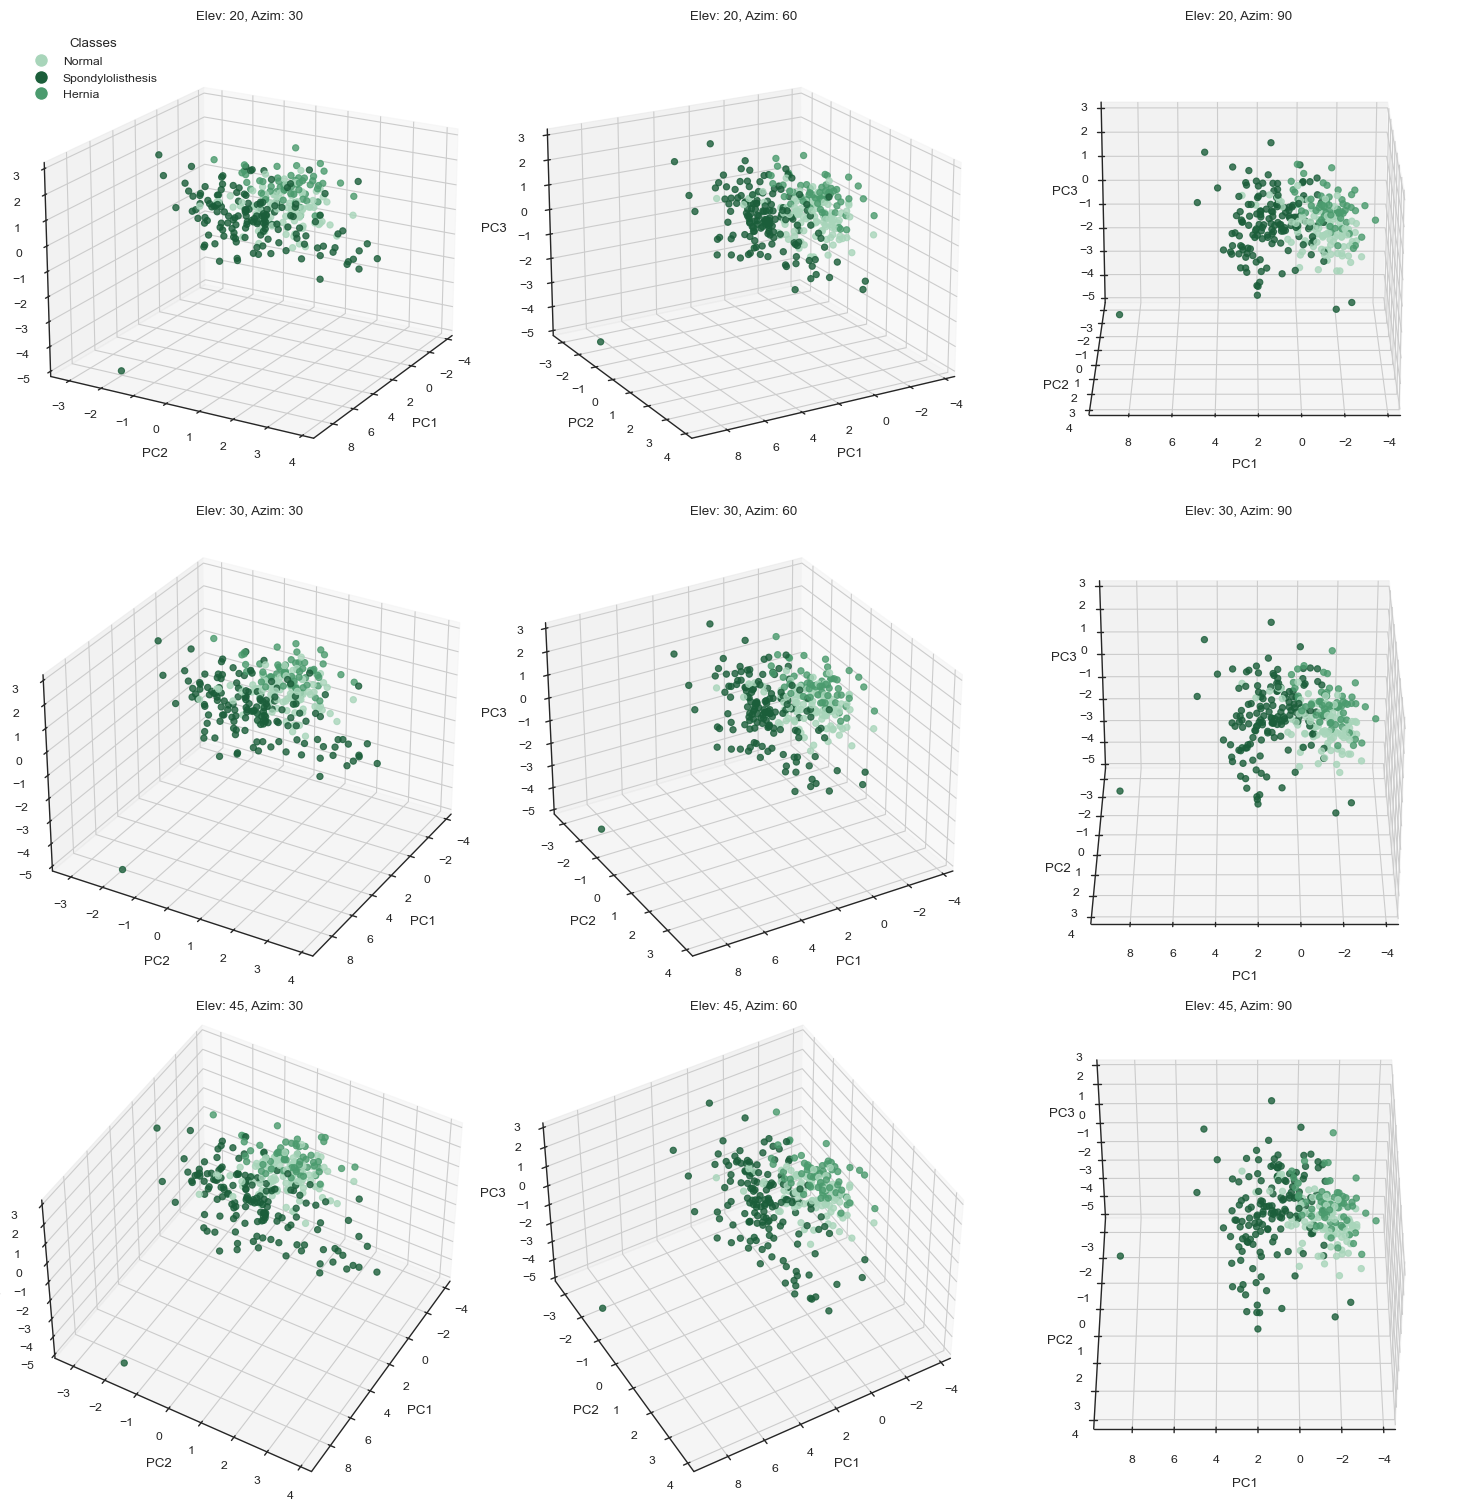

In [162]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


pc1 = df['PC1']
pc2 = df['PC2']
pc3 = df['PC3']
classes = df[['Normal', 'Hernia','Spondylolisthesis']].idxmax(axis=1)

color_map = {'Normal': '#A8D5BA', 'Spondylolisthesis': '#1B5E3A','Hernia':'#4B9B6E'}
colors = classes.map(color_map)

elevations = [20, 30, 45]
azimuths = [30, 60, 90]

fig = plt.figure(figsize=(15, 15))

for i, elev in enumerate(elevations):
    for j, azim in enumerate(azimuths):
        ax = fig.add_subplot(3, 3, i * 3 + j + 1, projection='3d')
        
        scatter = ax.scatter(pc1, pc2, pc3, c=colors, s=20, alpha=0.8)
        
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        ax.set_title(f'Elev: {elev}, Azim: {azim}')
        ax.view_init(elev=elev, azim=azim)
        
        if i == 0 and j == 0:
            handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=cls) 
                       for cls, color in color_map.items()]
            ax.legend(handles=handles, loc='upper left', title='Classes',frameon=False)

plt.tight_layout()
plt.show()



### 3. Modelling

In [163]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class',
       'Hernia', 'Normal', 'Spondylolisthesis', 'Abnormal', 'all', 'mask1',
       'mask2', 'mask3', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
      dtype='object')

In [164]:
X = df[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y = df[['Normal', 'Abnormal']].idxmax(axis=1) 

In [165]:
y.head()

0    Abnormal
1    Abnormal
2    Abnormal
3    Abnormal
4    Abnormal
dtype: object

#### MLPipeline Class

Below provides the implementation of a class that handles all the machine learning model training, tuning and evaluation functions to simplify the codebase.

In [166]:
class MLPipeline:
    """
    A class to represent a Machine Learning Pipeline for both Binary and Multi-Class Classification Problems.
    """
    def __init__(self, model, df, score, test_size=0.2, random_state=42, pca=False, binary=True):
        self.model = model
        self.df = df
        self.test_size = test_size
        self.random_state = random_state
        self.X = df[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
        if binary:
            self.y = df[['Normal', 'Abnormal']].idxmax(axis=1)
        else:
            self.y = df[['Normal', 'Hernia', 'Spondylolisthesis']].idxmax(axis=1)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=self.test_size, random_state=self.random_state)
        self.score = score
        self.pca = pca

    def create_pipeline(self, model):
        """
        Create a Scikit-Learn Pipeline with a RobustScaler and the specified model.
        """
        if model == 'logistic':
            if self.pca:
                return Pipeline([
                    ('scaler', RobustScaler()),
                    ('pca', PCA()),
                    ('model', LogisticRegression(solver='saga'))
                ])
            return Pipeline([
                ('scaler', RobustScaler()),
                ('model', LogisticRegression(solver='saga'))
            ])
        elif model == 'svm':
            if self.pca:
                return Pipeline([
                    ('scaler', RobustScaler()),
                    ('pca', PCA()),
                    ('model', SVC())
                ])
            return Pipeline([
                ('scaler', RobustScaler()),
                ('model', SVC())
            ])
        elif model == 'tree':
            return Pipeline([
                ('model', DecisionTreeClassifier(random_state=42))
            ])
        elif model == 'forest':
            return Pipeline([
                ('model', RandomForestClassifier(random_state=42))
            ])
        elif model == 'adaboost tree':
            return Pipeline([
                    ('model', AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42, max_depth=1), random_state=42))
                ])
        

    def create_params(self, model):
        """
        Create a dictionary of hyperparameters for the specified model.
        """
        if model == 'logistic':
            if self.pca:
                return {
                    'model__C': [0.1, 0.2, 0.5, 1],
                    'pca__n_components': [1, 2, 3, 4, 5, 6],
                    'model__penalty': ['l1', 'l2'],
                }
            return {
                'model__C': [0.1, 0.2, 0.5, 1],
                'model__penalty': ['l1', 'l2'],
            }
        elif model == 'svm':
            if self.pca:
                return {
                    'model__C': [0.1, 0.2, 0.5, 1],
                    'model__kernel': ['linear', 'rbf'],
                    'model__gamma': ['scale', 'auto'],
                    'pca__n_components': [1, 2, 3, 4, 5, 6],
                }
            return {
                'model__C': [0.1, 0.2, 0.5, 1],
                'model__kernel': ['linear', 'rbf'],
                'model__gamma': ['scale', 'auto'],
            }
        elif model == 'tree':
            return {
                'model__max_depth': [3, 5, 10],
                'model__min_samples_split': [2, 5, 10],
                'model__min_samples_leaf': [1, 2, 5],
            }
        elif model == 'forest':
            return {
                'model__n_estimators': [10,50,100, 200, 500],
                'model__max_depth': [1, 5, 10, 20],
                'model__min_samples_split': [1, 5, 10, 20],
                'model__min_samples_leaf': [1, 3, 7, 15],
            }
    
        elif model == 'adaboost tree':
            return {
                'model__n_estimators': [10,20,50],
                'model__learning_rate': [0.01, 0.1, 0.5, 1.0],
            }

    def fit_model(self):
        """
        Fit the specified model on the training data.
        """
        pipeline = self.create_pipeline(self.model)
        param_grid = self.create_params(self.model)
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=self.score)
        grid_search.fit(self.X_train, self.y_train)
        optimal_params = grid_search.best_params_
        optimal_cv_score = grid_search.best_score_

        return grid_search, optimal_params, optimal_cv_score
    
    def evaluate_model(self, grid_search):
        """
        Evaluate the specified model on the test data.
        """
        grid_search.fit(self.X_train, self.y_train)
        y_pred = grid_search.best_estimator_.predict(self.X_test)
        classification_rep = classification_report(self.y_test, y_pred)
        conf_matrix = confusion_matrix(self.y_test, y_pred)

        return classification_rep, conf_matrix
    
    def plot_confusion_matrix(self, conf_matrix):
        """
        Plot the confusion matrix.
        """
        plt.figure(figsize=(4, 4))
        sns.heatmap(conf_matrix,cbar=False ,annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(self.y_test), yticklabels=np.unique(self.y_test))
        plt.yticks(rotation=45)
        plt.xticks(rotation=45)
        if pca:
            plt.title(f'Confusion Matrix for {self.model} with PCA')
        plt.title(f'Confusion Matrix for {self.model}')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()
    
    def plot_feature_importance(self, best_model):
        """
        Plot the feature importance.
        Only works for tree-based models.
        """
        best_treebased_model = best_model.best_estimator_.named_steps['model']
        feature_importance = best_treebased_model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': self.X.columns,
            'Importance': feature_importance
        }).sort_values(by='Importance', ascending=False)

        sns.set_style("white")

        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Greens')
        plt.title('Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Feature')

        plt.grid(axis='x', linestyle='--', linewidth=0.7)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        plt.tight_layout()
        plt.show()
    
    def plot_tree(self, best_model):
        """
        Plot the decision tree.
        Only works for tree-based models.
        """
        best_tree = best_model.best_estimator_.named_steps['model']
        plt.figure(figsize=(12, 8))
        plot_tree(best_tree, feature_names=self.X.columns, class_names=[str(cls) for cls in best_tree.classes_], filled=True)
        plt.title('Decision Tree Visualization')
        plt.show()
    
    def get_tree_rules(self, best_model):
        """
        Get the decision tree rules.
        """
        best_tree = best_model.best_estimator_.named_steps['model']
        feature_importance = best_tree.feature_importances_
        for feature, importance in zip(X.columns, feature_importance):
            print(f"Feature: {feature}, Importance: {importance:.4f}")

        tree_rules = export_text(best_tree, feature_names=list(X.columns))
        return tree_rules

#### Logistic Regression

In [167]:
LRPCA_binary = MLPipeline('logistic', df, 'f1_weighted', pca=True)

In [168]:
LRPCA_binarymodel, LRPCA_binaryparamaters, LRPCA_binaryscore = LRPCA_binary.fit_model()
LRPCA_binaryclassification_rep, LRPCA_binaryconf_matrix = LRPCA_binary.evaluate_model(LRPCA_binarymodel)

In [169]:
print("Best Parameters:", LRPCA_binaryparamaters)
print("Best Cross-Validation Score:", LRPCA_binaryscore)

Best Parameters: {'model__C': 1, 'model__penalty': 'l2', 'pca__n_components': 5}
Best Cross-Validation Score: 0.8547391120464335


In [170]:
print("\nClassification Report on Test Data:")
print(LRPCA_binaryclassification_rep)


Classification Report on Test Data:
              precision    recall  f1-score   support

    Abnormal       0.91      0.91      0.91        44
      Normal       0.78      0.78      0.78        18

    accuracy                           0.87        62
   macro avg       0.84      0.84      0.84        62
weighted avg       0.87      0.87      0.87        62



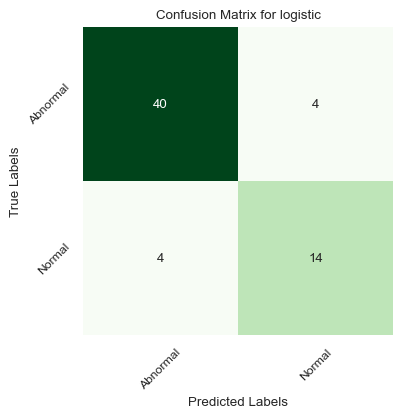

In [171]:
LRPCA_binary.plot_confusion_matrix(LRPCA_binaryconf_matrix)

In [172]:
LR_binary = MLPipeline('logistic', df, 'f1_weighted')

In [173]:
LR_binarymodel, LR_binaryparamaters, LR_binaryscore = LR_binary.fit_model()
LR_binaryclassification_rep, LR_binaryconf_matrix = LR_binary.evaluate_model(LR_binarymodel)

In [174]:
print("Best Parameters:", LR_binaryparamaters)
print("Best Cross-Validation Score:", LR_binaryscore)

Best Parameters: {'model__C': 0.5, 'model__penalty': 'l1'}
Best Cross-Validation Score: 0.8519467321002503


In [175]:
print("\nClassification Report on Test Data:")
print(LR_binaryclassification_rep)


Classification Report on Test Data:
              precision    recall  f1-score   support

    Abnormal       0.91      0.91      0.91        44
      Normal       0.78      0.78      0.78        18

    accuracy                           0.87        62
   macro avg       0.84      0.84      0.84        62
weighted avg       0.87      0.87      0.87        62



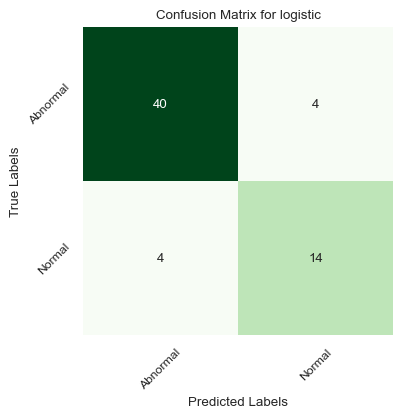

In [176]:
LR_binary.plot_confusion_matrix(LR_binaryconf_matrix)

Best Logisitc regression model using PCA input only required 5 pcs. This still performed marginally worse than logisitc regression with raw input features, suggesting using PC's as inputs not neccasirly better. May change if more data avaliable

#### SVM

In [177]:
SVMPCA_binary = MLPipeline('svm', df, 'f1_weighted', pca=True)

In [178]:
SVMPCA_binarymodel, SVMPCA_binaryparamaters, SVMPCA_binaryscore = SVMPCA_binary.fit_model()
SVMPCA_binaryclassification_rep, SVMPCA_binaryconf_matrix = SVMPCA_binary.evaluate_model(SVMPCA_binarymodel)

In [179]:
print("Best Parameters:", SVMPCA_binaryparamaters)
print("Best Cross-Validation Score:", SVMPCA_binaryscore)

Best Parameters: {'model__C': 1, 'model__gamma': 'auto', 'model__kernel': 'rbf', 'pca__n_components': 5}
Best Cross-Validation Score: 0.8699963226294475


In [180]:
print("\nClassification Report on Test Data:")
print(SVMPCA_binaryclassification_rep)


Classification Report on Test Data:
              precision    recall  f1-score   support

    Abnormal       0.87      0.89      0.88        44
      Normal       0.71      0.67      0.69        18

    accuracy                           0.82        62
   macro avg       0.79      0.78      0.78        62
weighted avg       0.82      0.82      0.82        62



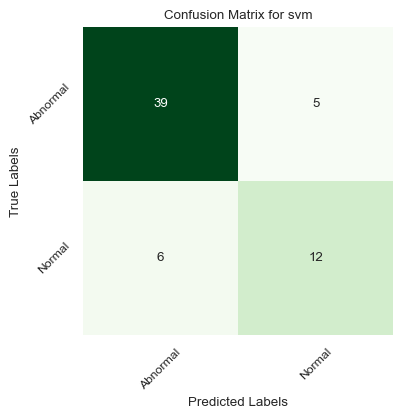

In [181]:
SVMPCA_binary.plot_confusion_matrix(SVMPCA_binaryconf_matrix)

SVM with PCA does worse than logistic regression with PCA based off the confusion matrix. 5 PC's determed as ideal.

In [182]:
SVM_binary = MLPipeline('svm', df, 'f1_weighted')

In [183]:
SVM_binarymodel, SVM_binaryparamaters, SVM_binaryscore = SVM_binary.fit_model()
SVM_binaryclassification_rep, SVM_binaryconf_matrix = SVM_binary.evaluate_model(SVM_binarymodel)

In [184]:
print("Best Parameters:", SVM_binaryparamaters)
print("Best Cross-Validation Score:", SVM_binaryscore)

Best Parameters: {'model__C': 1, 'model__gamma': 'auto', 'model__kernel': 'rbf'}
Best Cross-Validation Score: 0.8623309407953801


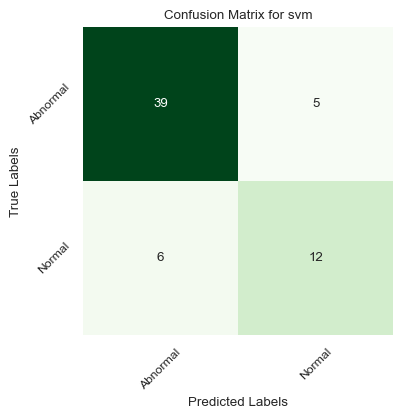

In [185]:
SVM_binary.plot_confusion_matrix(SVM_binaryconf_matrix)

In [186]:
print("\nClassification Report on Test Data:")
print(SVM_binaryclassification_rep)


Classification Report on Test Data:
              precision    recall  f1-score   support

    Abnormal       0.87      0.89      0.88        44
      Normal       0.71      0.67      0.69        18

    accuracy                           0.82        62
   macro avg       0.79      0.78      0.78        62
weighted avg       0.82      0.82      0.82        62



#### Decision Tree

In [187]:
DT_binary = MLPipeline('tree', df, 'f1_weighted')

In [188]:
DT_binarymodel, DT_binaryparamaters, DT_binaryscore = DT_binary.fit_model()
DT_binaryclassification_rep, DT_binaryconf_matrix = DT_binary.evaluate_model(DT_binarymodel)

In [189]:
print("Best Parameters:", DT_binaryparamaters)
print("Best Cross-Validation Score:", DT_binaryscore)

Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}
Best Cross-Validation Score: 0.8180277406800549


In [190]:
print("\nClassification Report on Test Data:")
print(DT_binaryclassification_rep)


Classification Report on Test Data:
              precision    recall  f1-score   support

    Abnormal       0.83      0.91      0.87        44
      Normal       0.71      0.56      0.62        18

    accuracy                           0.81        62
   macro avg       0.77      0.73      0.75        62
weighted avg       0.80      0.81      0.80        62



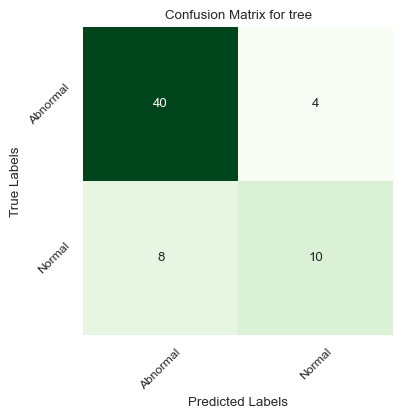

In [191]:
DT_binary.plot_confusion_matrix(DT_binaryconf_matrix)

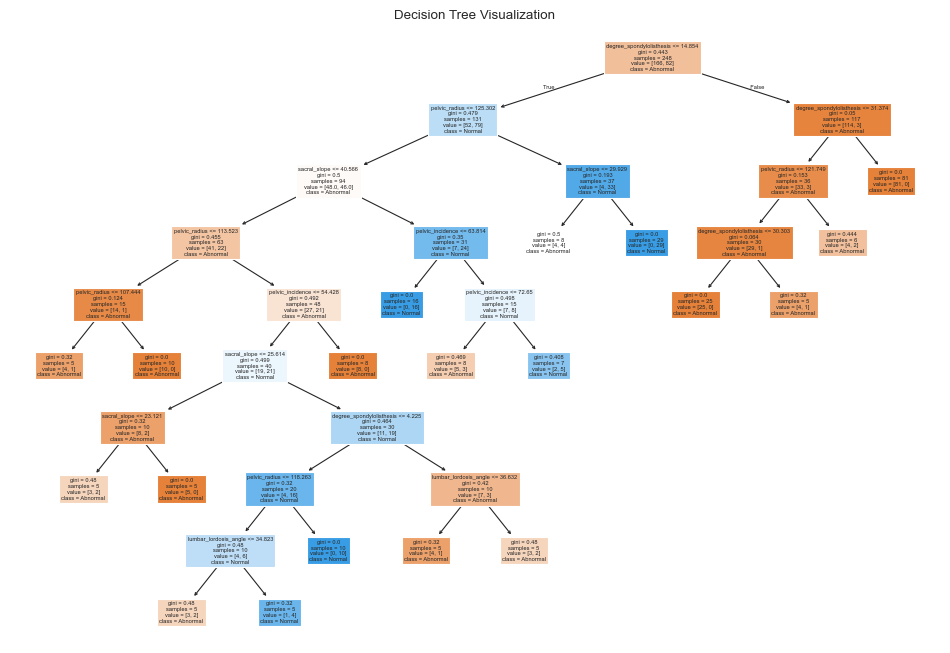

In [192]:
DT_binary.plot_tree(DT_binarymodel)

In [193]:
print(DT_binary.get_tree_rules(DT_binarymodel))

Feature: pelvic_incidence, Importance: 0.0954
Feature: pelvic_tilt, Importance: 0.0000
Feature: lumbar_lordosis_angle, Importance: 0.0121
Feature: sacral_slope, Importance: 0.1720
Feature: pelvic_radius, Importance: 0.1751
Feature: degree_spondylolisthesis, Importance: 0.5455
|--- degree_spondylolisthesis <= 14.85
|   |--- pelvic_radius <= 125.30
|   |   |--- sacral_slope <= 40.57
|   |   |   |--- pelvic_radius <= 113.52
|   |   |   |   |--- pelvic_radius <= 107.44
|   |   |   |   |   |--- class: Abnormal
|   |   |   |   |--- pelvic_radius >  107.44
|   |   |   |   |   |--- class: Abnormal
|   |   |   |--- pelvic_radius >  113.52
|   |   |   |   |--- pelvic_incidence <= 54.43
|   |   |   |   |   |--- sacral_slope <= 25.61
|   |   |   |   |   |   |--- sacral_slope <= 23.12
|   |   |   |   |   |   |   |--- class: Abnormal
|   |   |   |   |   |   |--- sacral_slope >  23.12
|   |   |   |   |   |   |   |--- class: Abnormal
|   |   |   |   |   |--- sacral_slope >  25.61
|   |   |   |   |   |

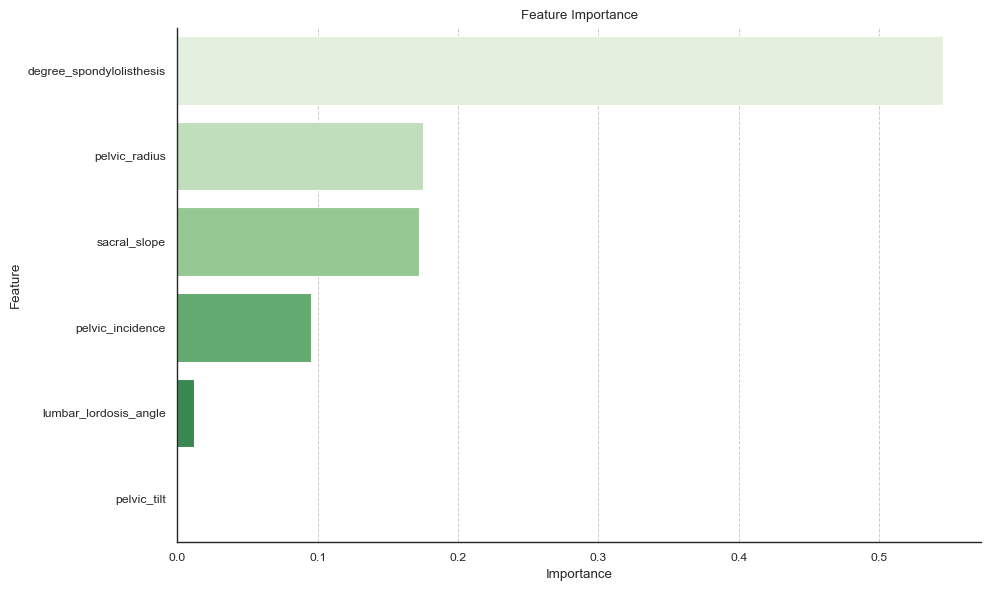

In [194]:
DT_binary.plot_feature_importance(DT_binarymodel)

The decision tree model was used to visualise the feature importance of each feature. In this instance, pelvic_tilt had no impact on the predicted classification.

#### Random Forest

In [195]:
RF_binary = MLPipeline('forest', df, 'f1_weighted')

In [196]:
# might take 2 mins
RF_binarymodel, RF_binaryparamaters, RF_binaryscore = RF_binary.fit_model()
RF_binaryclassification_rep, RF_binaryconf_matrix = RF_binary.evaluate_model(RF_binarymodel)

In [197]:
print("Best Parameters:", RF_binaryparamaters)
print("Best Cross-Validation Score:", RF_binaryscore)

Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 10}
Best Cross-Validation Score: 0.8424560655223763


In [198]:
print("\nClassification Report on Test Data:")
print(RF_binaryclassification_rep)


Classification Report on Test Data:
              precision    recall  f1-score   support

    Abnormal       0.83      0.89      0.86        44
      Normal       0.67      0.56      0.61        18

    accuracy                           0.79        62
   macro avg       0.75      0.72      0.73        62
weighted avg       0.78      0.79      0.78        62



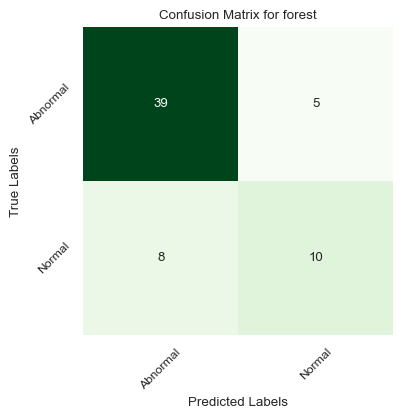

In [199]:
RF_binary.plot_confusion_matrix(RF_binaryconf_matrix)

The random forest underperforms compared to the logistic regression model. Potentially due to the small dataset being used. Would expect a random forest to eventually outperform logistic regression if more datapoints became avaliable.

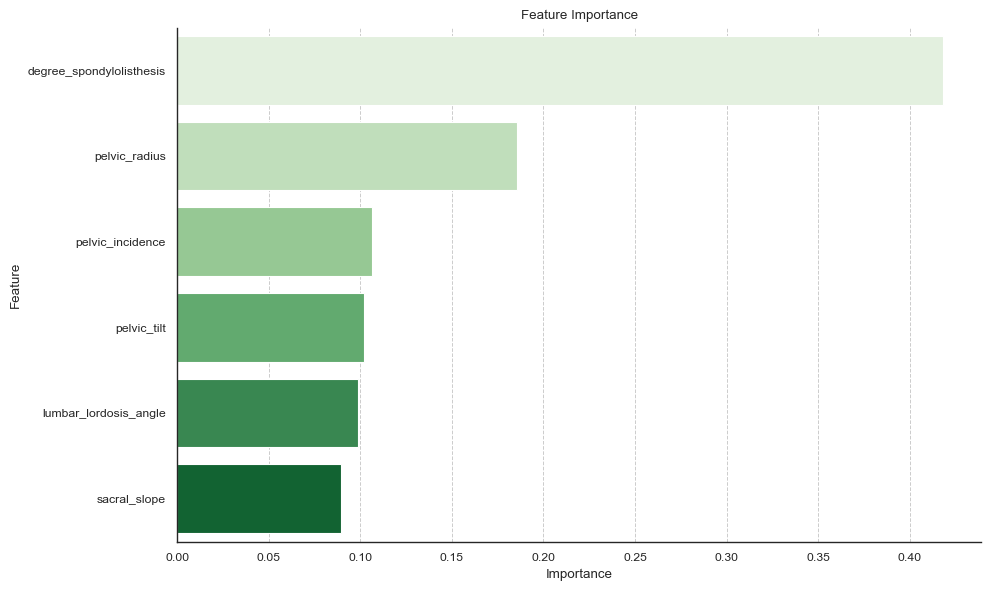

In [200]:
RF_binary.plot_feature_importance(RF_binarymodel)

#### AdaBoost

In [201]:
AdaTree_binary = MLPipeline('adaboost tree', df, 'f1_weighted')

In [202]:
AdaTree_binarymodel, AdaTree_binaryparamaters, AdaTree_binaryscore = AdaTree_binary.fit_model()
AdaTree_binaryclassification_rep, AdaTree_binaryconf_matrix = AdaTree_binary.evaluate_model(AdaTree_binarymodel)

In [203]:
print("Best Parameters:", AdaTree_binaryparamaters)
print("Best Cross-Validation Score:", AdaTree_binaryscore)

Best Parameters: {'model__learning_rate': 0.5, 'model__n_estimators': 10}
Best Cross-Validation Score: 0.8126082066339781



Classification Report on Test Data:
              precision    recall  f1-score   support

    Abnormal       0.90      0.84      0.87        44
      Normal       0.67      0.78      0.72        18

    accuracy                           0.82        62
   macro avg       0.78      0.81      0.79        62
weighted avg       0.83      0.82      0.83        62



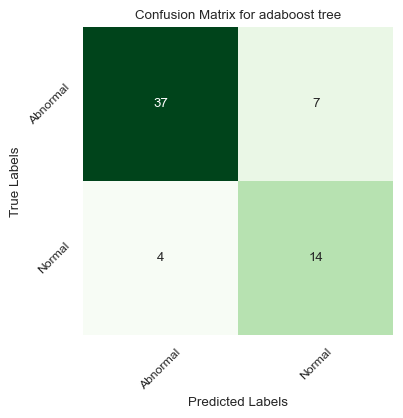

In [204]:
print("\nClassification Report on Test Data:")
print(AdaTree_binaryclassification_rep)
AdaTree_binary.plot_confusion_matrix(AdaTree_binaryconf_matrix)

#### Multiclass Classification (Bonus Challenge)

Below we compare the logistic regression, SVM, random forest and AdaBoost models in a multi-class classification setting.

#### Logistic Regression

In [205]:
LR_multi = MLPipeline('logistic', df, 'f1_weighted', binary=False)

In [206]:
LR_multimodel, LR_multiparamaters, LR_multiscore = LR_multi.fit_model()
LR_multiclassification_rep, LR_multiconf_matrix = LR_multi.evaluate_model(LR_multimodel)

In [207]:
print("Best Parameters:", LR_multiparamaters)
print("Best Cross-Validation Score:", LR_multiscore)

Best Parameters: {'model__C': 0.5, 'model__penalty': 'l1'}
Best Cross-Validation Score: 0.8555519649200273


In [208]:
print("\nClassification Report on Test Data:")
print(LR_multiclassification_rep)


Classification Report on Test Data:
                   precision    recall  f1-score   support

           Hernia       0.67      0.67      0.67        12
           Normal       0.78      0.78      0.78        18
Spondylolisthesis       1.00      1.00      1.00        32

         accuracy                           0.87        62
        macro avg       0.81      0.81      0.81        62
     weighted avg       0.87      0.87      0.87        62



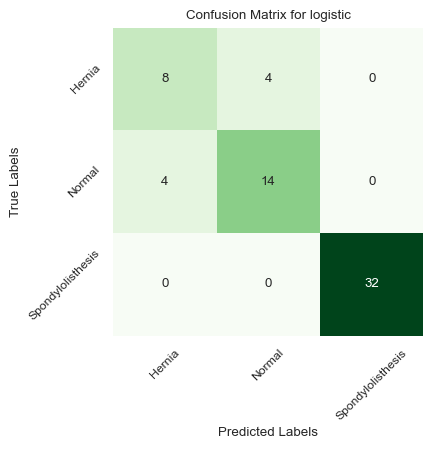

In [209]:
LR_multi.plot_confusion_matrix(LR_multiconf_matrix)

#### SVM

In [210]:
SVM_multi = MLPipeline('svm', df, 'f1_weighted', binary=False)

In [211]:
SVM_multimodel, SVM_multiparamaters, SVM_multiscore = SVM_multi.fit_model()
SVM_multiclassification_rep, SVM_multiconf_matrix = SVM_multi.evaluate_model(SVM_multimodel)

In [212]:
print("Best Parameters:", SVM_multiparamaters)
print("Best Cross-Validation Score:", SVM_multiscore)

Best Parameters: {'model__C': 0.2, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Best Cross-Validation Score: 0.8798294416834225


In [213]:
print("\nClassification Report on Test Data:")
print(SVM_multiclassification_rep)


Classification Report on Test Data:
                   precision    recall  f1-score   support

           Hernia       0.67      0.67      0.67        12
           Normal       0.78      0.78      0.78        18
Spondylolisthesis       1.00      1.00      1.00        32

         accuracy                           0.87        62
        macro avg       0.81      0.81      0.81        62
     weighted avg       0.87      0.87      0.87        62



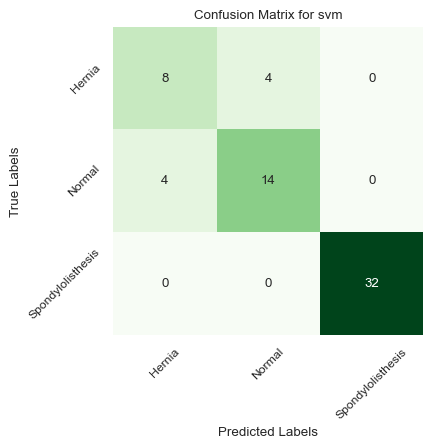

In [214]:
SVM_multi.plot_confusion_matrix(SVM_multiconf_matrix)

#### Random Forest

In [215]:
RF_multi = MLPipeline('forest', df, 'f1_weighted', binary=False)

In [216]:
# might take 2 mins
RF_multimodel, RF_multiparamaters, RF_multiscore = RF_multi.fit_model()
RF_multiclassification_rep, RF_multiconf_matrix = RF_multi.evaluate_model(RF_multimodel)

In [217]:
print("Best Parameters:", RF_multiparamaters)
print("Best Cross-Validation Score:", RF_multiscore)

Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 20, 'model__n_estimators': 200}
Best Cross-Validation Score: 0.8551166050962813


In [218]:
print("\nClassification Report on Test Data:")
print(RF_multiclassification_rep)


Classification Report on Test Data:
                   precision    recall  f1-score   support

           Hernia       0.45      0.42      0.43        12
           Normal       0.67      0.67      0.67        18
Spondylolisthesis       0.97      1.00      0.98        32

         accuracy                           0.79        62
        macro avg       0.70      0.69      0.70        62
     weighted avg       0.78      0.79      0.79        62



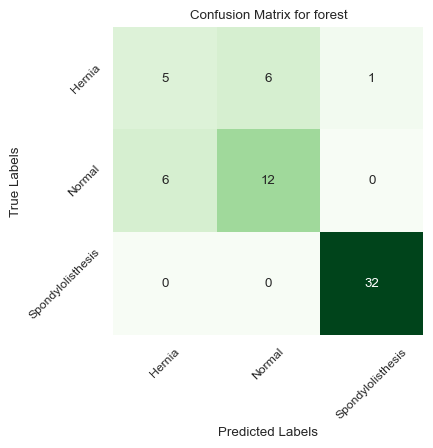

In [219]:
RF_multi.plot_confusion_matrix(RF_multiconf_matrix)

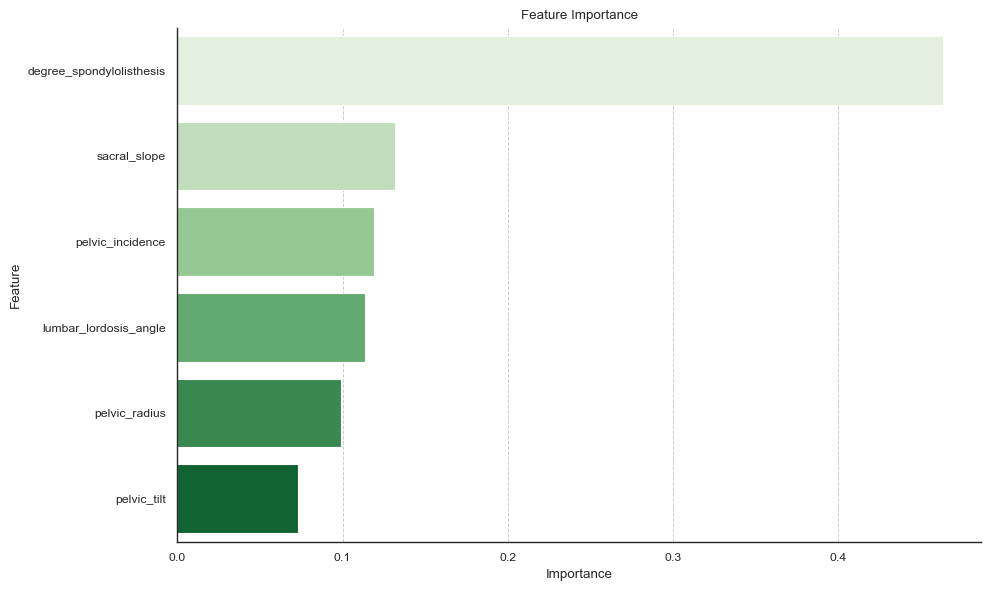

In [220]:
RF_multi.plot_feature_importance(RF_multimodel)

#### AdaBoost

In [221]:
#### AdaBoost
AdaTree_multi = MLPipeline('adaboost tree', df, 'recall_weighted',binary=False)
AdaTree_multimodel, AdaTree_multiparamaters, AdaTree_multiscore = AdaTree_multi.fit_model()

In [222]:
AdaTree_multiclassification_rep, AdaTree_multiconf_matrix = AdaTree_multi.evaluate_model(AdaTree_multimodel)
print("Best Parameters:", AdaTree_multiparamaters)

Best Parameters: {'model__learning_rate': 0.01, 'model__n_estimators': 10}


Best Cross-Validation Score: 0.7622857142857143

Classification Report on Test Data:
                   precision    recall  f1-score   support

           Hernia       0.00      0.00      0.00        12
           Normal       0.60      1.00      0.75        18
Spondylolisthesis       1.00      1.00      1.00        32

         accuracy                           0.81        62
        macro avg       0.53      0.67      0.58        62
     weighted avg       0.69      0.81      0.73        62



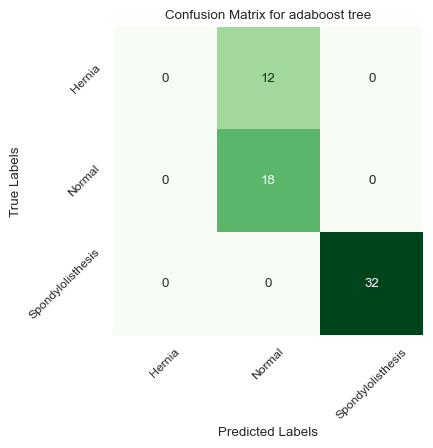

In [223]:
print("Best Cross-Validation Score:", AdaTree_multiscore)
print("\nClassification Report on Test Data:")
print(AdaTree_multiclassification_rep)
AdaTree_multi.plot_confusion_matrix(AdaTree_multiconf_matrix)